Gradient Boosting Classifier

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer                     # binary dataset
from sklearn.model_selection import train_test_split                # splitting
from sklearn.ensemble import GradientBoostingClassifier             # GB classifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)             # features
y = pd.Series(data.target)                                          # labels

In [3]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)                         

In [4]:
# Step 4: Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(
    loss='log_loss',          # binary classification loss
    learning_rate=0.1,        # shrink each tree’s output
    n_estimators=150,         # number of boosting stages
    max_depth=3,              # depth of each individual tree
    subsample=1.0,            # 1.0 means use all samples (can reduce to 0.8)
    max_features=None,        # consider all features
    random_state=42
)

In [5]:
# Step 5: Train model
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

In [6]:
# Step 7: Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231


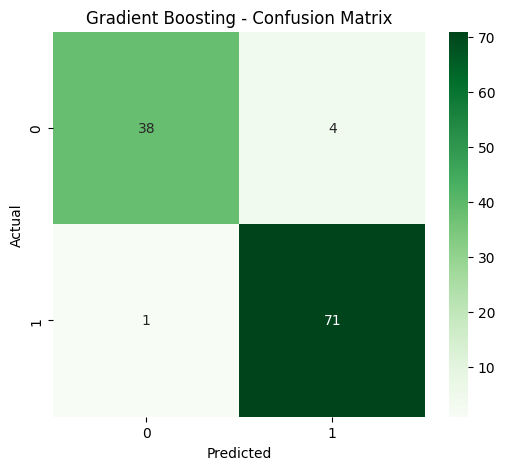

In [7]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

In [9]:
# Step 9: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 150, 200],
    "max_depth": [2, 3, 4]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [10]:
# Step 10: Save model + predictions
joblib.dump(model, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\gradient_boosting_Classifier_model.pkl")
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\GradientBoosting_Predictions.csv", index=False)

Gradient Boosting Regression (Quick Demo)

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

data_reg = fetch_california_housing(as_frame=True)
Xr = data_reg.data
yr = data_reg.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

print("GB Regression R2:", r2_score(yr_test, yr_pred))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))


GB Regression R2: 0.8004451261281281
RMSE: 0.511369238782928
